In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\gefitinib_integrated.csv')
data.head(2)

,Cell names,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Gefitinib
0,BR:MDA-MB-231,-0.386,0.786,0.931,-0.086,-0.508,0.744,-0.364,-0.510,-0.078,...,0.026098,0.029986,0.025863,0.053371,0.038207,0.02327,0.030655,0.040250,MDAMB231,5.078333
1,BR:HS 578T,-0.585,0.021,-0.801,-0.795,-0.499,0.720,-1.207,0.098,0.823,...,0.021282,0.024981,0.013982,0.054200,0.029125,0.01075,0.015981,0.035154,HS578T,5.173333


In [3]:
target = data.pop('Gefitinib')
X = data.select_dtypes('float64')

In [4]:
target.shape, X.shape

((49,), (49, 27221))

In [5]:
X.head(2)

,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,TUBB8P11,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,-0.386,0.786,0.931,-0.086,-0.508,0.744,-0.364,-0.510,-0.078,-0.045,...,0.058283,0.031639,0.026098,0.029986,0.025863,0.053371,0.038207,0.02327,0.030655,0.040250
1,-0.585,0.021,-0.801,-0.795,-0.499,0.720,-1.207,0.098,0.823,1.923,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.01075,0.015981,0.035154


In [6]:
scaler = StandardScaler()
X = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
X.head(2)

,WASH7P,FAM138F,LOC729737,RPL23AP21,CICP7,CICP3,LOC101060494,LINC00115,LINC01128,TUBB8P11,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,-0.283205,0.867589,1.129076,0.042324,-0.576742,0.909919,-0.385326,-0.533423,-0.047319,-0.079371,...,-0.905850,0.116323,-0.005360,-0.511451,0.115667,-1.131388,0.599451,0.018875,-0.108863,0.225088
1,-0.480597,0.055057,-0.786070,-0.742288,-0.567832,0.881857,-1.244896,0.430940,0.991509,2.151450,...,-0.742129,-0.408495,-0.681766,-1.051444,-1.706819,-1.059985,-0.412471,-1.667947,-1.435317,-0.274465


In [7]:
from sklearn.preprocessing import LabelEncoder

y = []
drug_mean = target.mean()
for i in list(target):
    if i > drug_mean:
        y.append('NR')
    else:
        y.append('R')
        
le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [8]:
y.value_counts()

1    31
0    18
dtype: int64

In [9]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [10]:
X.fillna(value = '0.0', inplace = True)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X,y = smote.fit_resample(X, y)

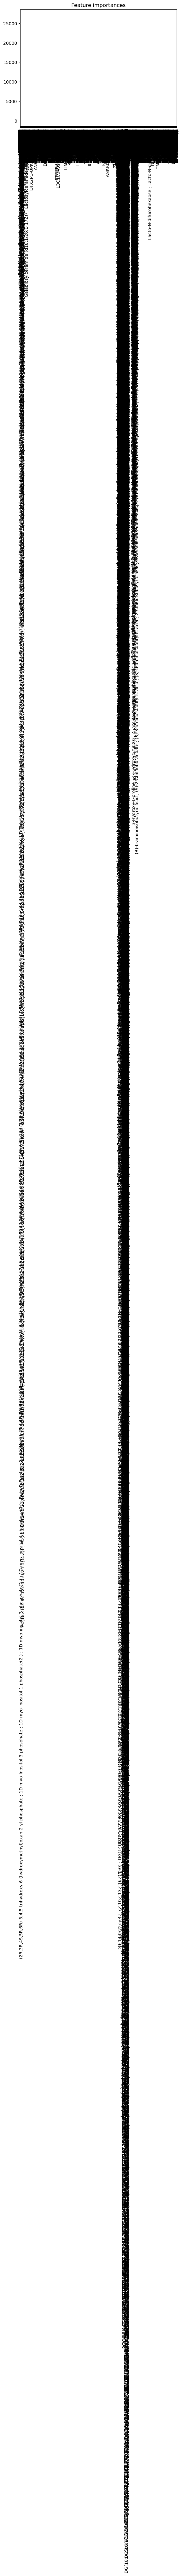

In [12]:
from xgboost import plot_importance

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

sfm = SelectFromModel(model, threshold = 0.002)
sfm.fit(X, y)

X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=43)

model.fit(X_train, y_train)
prediction = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, model.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, model.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



In [14]:
len(X_train.columns)

191

Text(50.722222222222214, 0.5, 'True Labels')

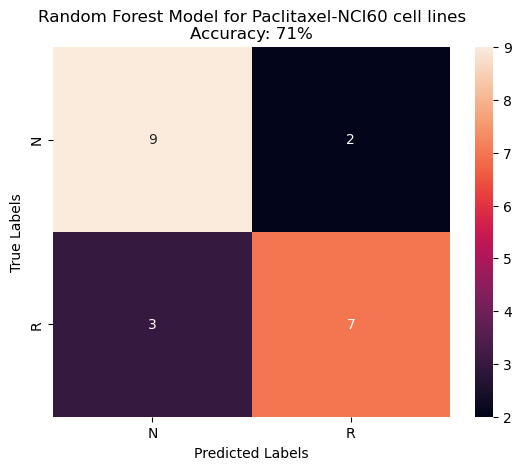

In [15]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Model for Paclitaxel-NCI60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

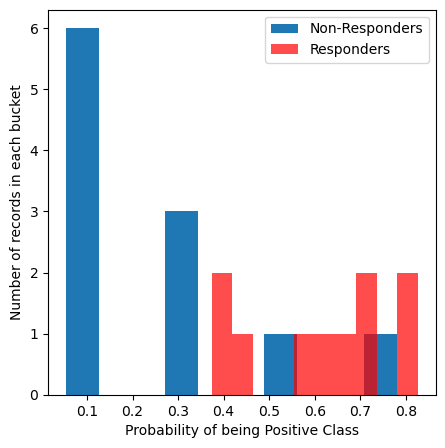

In [16]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [17]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i > max(prediction[y_test == 0]):
        count+=1
count, count/len(responders)

(2, 0.2)

In [18]:
max(prediction[y_test == 0])

0.78

In [19]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)
model2.fit(X_train, y_train)
prediction2 = model2.predict_proba(X_test)[:, 1]
y_pred = model2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, model2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, model2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.70      0.82        10

    accuracy                           0.86        21
   macro avg       0.89      0.85      0.85        21
weighted avg       0.89      0.86      0.85        21



Text(50.722222222222214, 0.5, 'True labels')

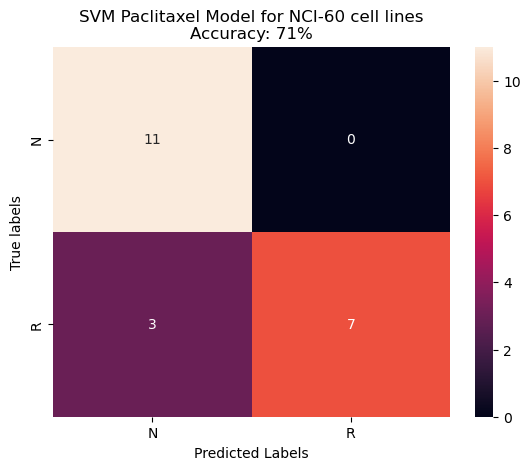

In [20]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Paclitaxel Model for NCI-60 cell lines\nAccuracy: 71%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')

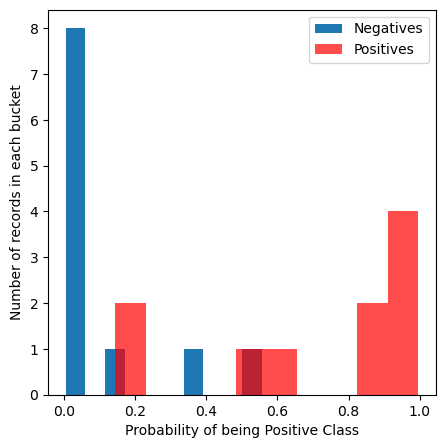

In [21]:
plt.figure(figsize=(5,5))
plt.hist(prediction2[y_test==0], label='Negatives')
plt.hist(prediction2[y_test==1], label='Positives', alpha=0.7, color = 'r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [22]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i > max(prediction2[y_test == 0]):
        count+=1
count, count/len(resp_svm)

(7, 0.7)

In [23]:
max(prediction2[y_test == 0])

0.5567217166042361

In [24]:
for i in list(X_train.columns):
    print(i)

CPTP
C1orf233
PRKCZ
KIAA2013
FAM76A
ZSCAN20
EDN2
ZYG11A
HOOK1
RBMXL1
PPM1J
OR6K6
GLUL
SNORA77
CR1L
RCOR3
CMPK2
PROC
EPC2
OLA1
SMARCAL1
CNTN6
ACAA1
DHX30
MON1A
ARF4
GBE1
ZBTB11
GUCA1C
RABL3
SLC12A8
STAG1
ASS1P7
FETUB
PPP1R2
SLC34A2
PAQR3
IBSP
GUSBP5
RPL19P11
SLC1A3
ANXA2R
UTP15
SLC12A2
PSD2
LINC01024
PCDHA3
RANBP17
HIST1H4B
POM121L6P
ZNF184
HIST1H2BL
E2F4P1
APOBEC2
MUT
ZNF451
RPL37P15
MIR30C2
MAN1A1
RPS4XP8
NOX3
THAP5
ASB15
FLNC
RP1L1
REEP4
TEX15
PROSC
MAPK6PS4
FTH1P11
TTC39B
SLC25A5P8
TOPORS
CHMP5
ANKRD18A
ANKRD20A7P
C9orf153
SYK
ANKRD18CP
NIPSNAP3A
ASTN2-AS1
AIFM1P1
CASC10
ANXA8
CHST3
CFAP70
ANKRD2
TACC2
MTG1
ODF3
ART1
UBQLNL
NAT10
HARBI1
TRIM53CP
OR4A11P
SLC22A10
KCNE3
KRT18P59
CHD4
RPSAP51
BHLHE41
AQP5
LYZ
BEST3
LOC100129447
HCAR1
RPLP1P13
PAN3-AS1
N4BP2L2
LINC00284
THSD1
MZT1
EFNB2
UBE2L1
LINC00643
SYNJ2BP
MAP3K9
SNORD56B
FCF1
PROX2
MIR487A
PPP2R5C
IGHV3-43
NPAP1
ABCB10P3
PHGR1
NDUFAF4P1
PRTG
GCNT3
LCTL
MKI67IPP4
HOMER2
ADAMTSL3
MRPL46
IFT140
ABCA17P
NTN3
SRRM2
IL32
C16orf89
NTAN1
